# Python Solutions to Tutorial 06

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat 

#df = pd.read_csv('Tutorial06_data.csv')

url = 'https://raw.githubusercontent.com/APS1040/Tutorials/main/Tutorial06_data.csv'
df = pd.read_csv(url)
df.head()

,Wafer,Layer thickness
0,1,11
1,2,16
2,3,22
3,4,14
4,5,34


## 1.	The uniformity of a silicon wafer following an etching process is determined by measuring the layer thickness at several locations and expressing uniformity as the range of the thicknesses. The uniformity determinations for 30 consecutive wafers processed through the etching tool are presented in the dataset. Is there evidence that uniformity is normally distributed?

Statistic: 1.158
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance_level [15.  10.   5.   2.5  1. ]


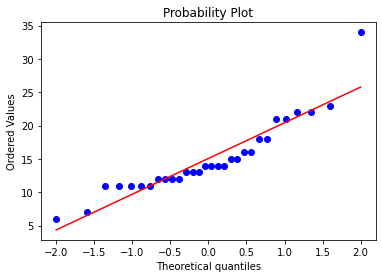

In [ ]:
import scipy.stats as stat
result=stat.anderson(df['Layer thickness'],'norm') #store results to improve output readability
print('Statistic: %.3f' % result.statistic)
print('Critical Values:',result.critical_values)
print('Significance_level', result.significance_level)
stat.probplot(df['Layer thickness'],plot=plt)
plt.show()

no it's not normal

## 2.	Take the natural logarithm of the data to make it normally distributed. Construct a control chart for individuals and a moving range control chart for uniformity for the etching process using the normally distributed data. Is the process in statistical control?

Statistic: 0.626
Critical Values: [0.521 0.593 0.712 0.83  0.988]
Significance_level [15.  10.   5.   2.5  1. ]


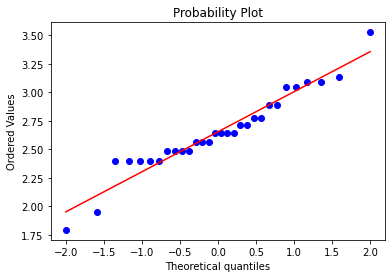

In [ ]:
a=df['Layer thickness'].dropna()
ln_a=np.log(a)
import scipy.stats as stat
result=stat.anderson(ln_a,'norm') #store results to improve output readability
print('Statistic: %.3f' % result.statistic)
print('Critical Values:',result.critical_values)
print('Significance_level', result.significance_level)
stat.probplot(ln_a,plot=plt)
plt.show()

In [ ]:
# now use I-MR
m=len(ln_a)
MR_samples = []
MR_acum=0
for i in range (0,m-1):
    MR = np.abs(ln_a[i+1]-ln_a[i])
    MR_samples.append(MR)
    MR_acum = MR_acum + MR

MR_bar=MR_acum/(m-1)
LCL=0
UCL=3.267*MR_bar
print(MR_bar,LCL,UCL)
    

0.3508855205640929 0 1.1463429956828914


In [ ]:
for i in range (0,m-1):
    if(MR_samples[i]>=UCL):
        print(i+1,'out of control')


It is in control

## 3.	What is the value of MR-bar?

In [ ]:
print(MR_bar)

0.3508855205640929


## 4.	What is the estimate of the standard deviation for this process? (for the normally distributed data).

In [ ]:
print(MR_bar/1.128) # MR/d2

0.3110687239043377


## 5.	What are the upper and lower control limits for the I-chart?

In [ ]:
X_bar = ln_a.mean()
UCL=X_bar+2.660*MR_bar #E2
LCL=X_bar-2.660*MR_bar
print(X_bar,LCL,UCL)

for i in range(0,m):
    if ()


2.653095195248599 1.719739710548112 3.586450679949086


## 6.	 What is the estimate of the mean for this process? (for the normally distributed data).

In [ ]:
print(X_bar)

2.653095195248599


## 7.	Suppose the process mean shifts to 2.7. What is the probability of detecting this shift on the X chart on the first subsequent sample? (consider the normally distributed data).

In [ ]:
n=1 # n is 1 when calculating beta for MR-I chart
Delta=2.7-X_bar
k=Delta/(MR_bar/1.128)
Beta=stat.norm.cdf(3-k*np.sqrt(n),0,1)-stat.norm.cdf(-3-k*np.sqrt(n),0,1)
print(Beta)
print(1-Beta)

0.9969944718041802
0.0030055281958197844


## 8.	What is the average run length for the shift described in the previous question?

In [ ]:
ARL=1/(1-Beta)
print(ARL)

332.7202191584302


## 9.	For the shift described previously, what is the probability of detecting this transformation on the 4th sample after its occurrence?

In [ ]:
Pr=Beta**3*(1-Beta)
print(Pr)

0.0029785099636229976
